In [1]:
from Angles_Determination import Angles_Ankle, Angles_Hip, Angles_Knee
from Load_Files import Load_Files
from Processing import Change_Range, Plot_Data, Resample, Same_size, Set_Data, Syncronize,timeMove, Plot_Ang
import copy

c:\Users\Jose Amorocho\OneDrive\Documentos\SAM_Pyhton\Processing.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['TimeStamp'] = time
c:\Users\Jose Amorocho\OneDrive\Documentos\SAM_Pyhton\Processing.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var.iloc[drv[f]:drv[(f)+1]] = - \


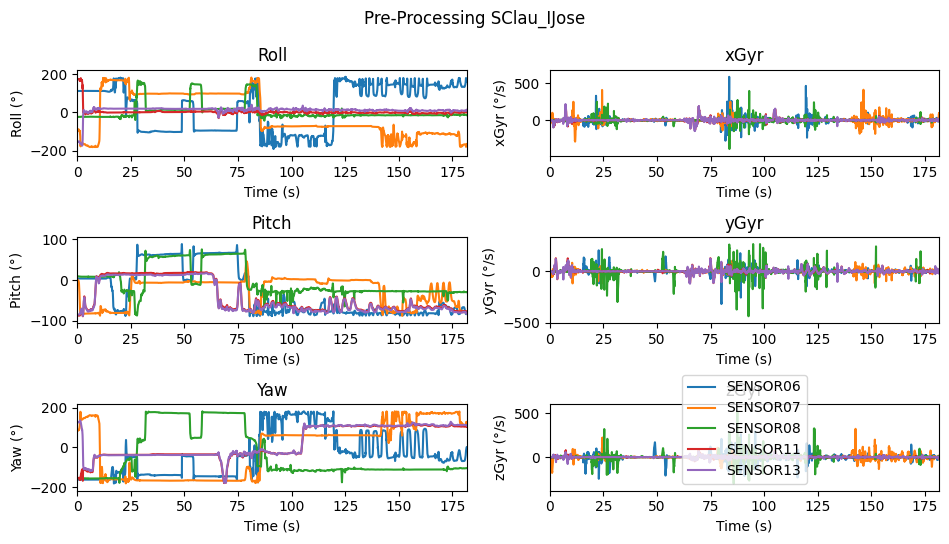

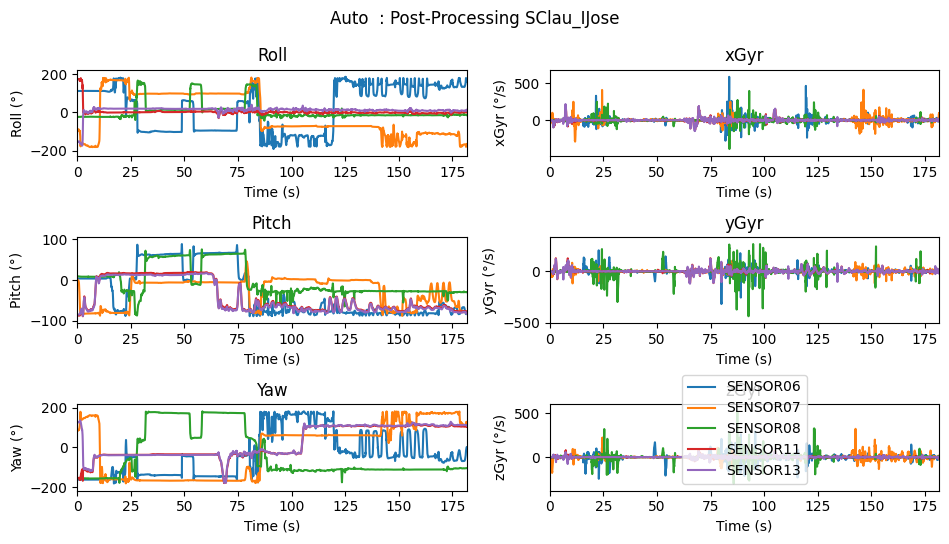

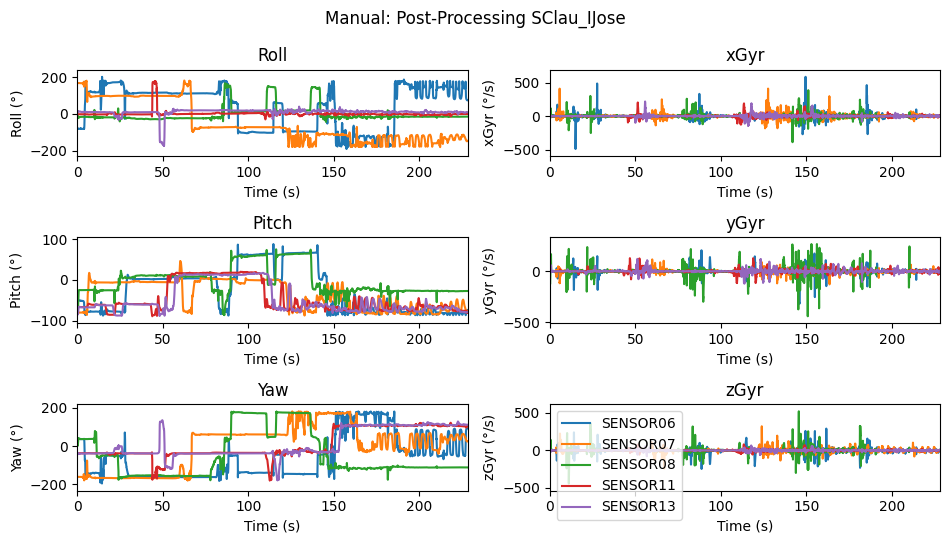

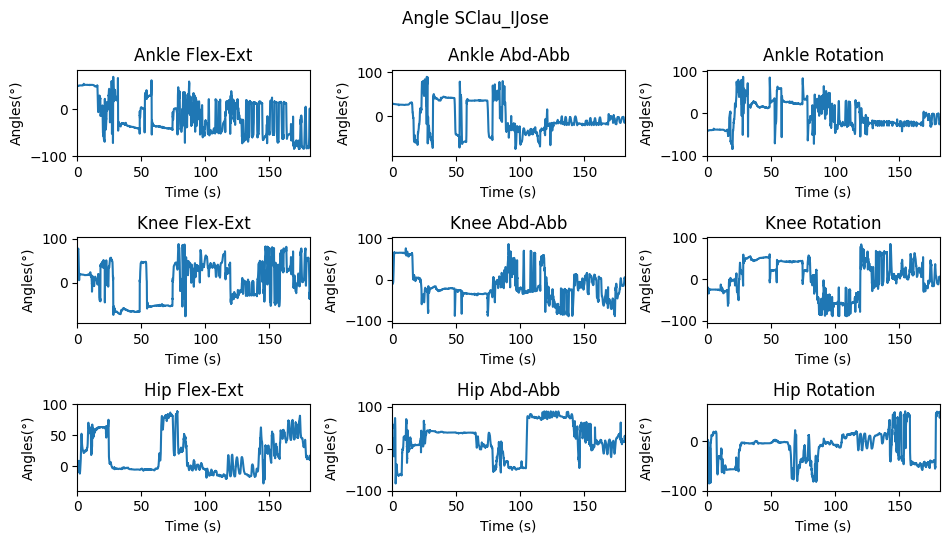

In [12]:
test= 'SClau_IJose' 
dia = 'Dia_2'
leg= 'r'
dir= "./2022_10_18/"+dia+'/'+test+'/'

# Load the data
data= Load_Files(dir)
# Set Start to 0 Sensors(SAM).
data= Set_Data(data)
# Adjust angles range to a continous angles.
data= Change_Range(data,150)
# Oversample the data to 200 Hz.
data= Resample(data,200)

data_a = copy.deepcopy(data)
data_m = copy.deepcopy(data)

data_a= Syncronize(data)
n = list(data_m.keys())
#if test == 'SJose_IClau':
if test == 'IClau_SJose':
    if dia == 'Dia_1':
        #syn= [-117.9,-111.385,0,-100.577,-36.335] # 1 SJose_IClau
        syn= [-9,  -6.5, -12,  0, -1.5] # 1 SClau_IJose
    if dia == 'Dia_2':
        #syn= [-14,-20,-23,-6,0] # 2 SJose_IClau
        syn= [-73, -69.6, -75.8, 0, -2.5] # 2 SClau_IJose
#if test == 'SJose_INat':
if test == 'IClau_SNat':
    if dia == 'Dia_1':
        #syn= [-117.9,-111.385,0,-100.577,-36.335] # 1 SJose_INat
        syn= [-15, -10, -18.5, 0, -2] # 1 SClau_INat
    if dia == 'Dia_2':
        #syn= [0,-18.63,-6.595,-24.6,-22.67] # 2 SJose_INat
        syn= [-8.3, -5.1, -14, 0, -0.8] # 2 SClau_INat

for i in range(0,len(n)):
    data_m[n[i]]= timeMove(data_m[n[i]],syn[i])
    t= data_m[n[i]]['TimeStamp']
    t= len(t.index[t<0])
    data_m[n[i]]= data_m[n[i]].iloc[t:, :]

# Resample the data to 50 Hz.
data  = Resample(data,50)
data_a= Resample(data_a,50)
data_m= Resample(data_m,50)
# Same size of the data.
Same_size(data_a)
Same_size(data_m)

# Plot the data
Plot_Data(data,test,'Pre-Processing')
Plot_Data(data_a,test,'Auto  : Post-Processing')
Plot_Data(data_m,test,'Manual: Post-Processing')

# Find Angles
ang_hip= Angles_Hip(data['SENSOR11'], data['SENSOR07'], leg)
ang_knee= Angles_Knee(data['SENSOR07'], data['SENSOR06'], leg)
ang_ankle= Angles_Ankle(data['SENSOR06'], data['SENSOR08'], leg)

time= data['SENSOR13']['TimeStamp']
Plot_Ang(test, time, ang_ankle, ang_knee, ang_hip)

